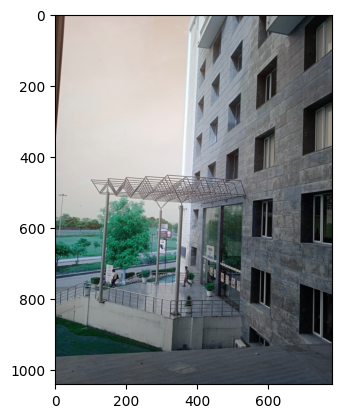

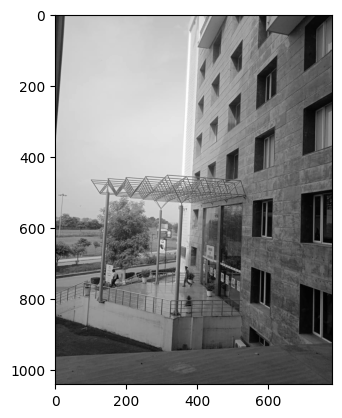

In [1]:
import cv2 
import matplotlib.pyplot as plt

img = cv2.imread('img2.jpg')
plt.imshow(img, cmap = 'gray')
plt.show()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')
plt.show()

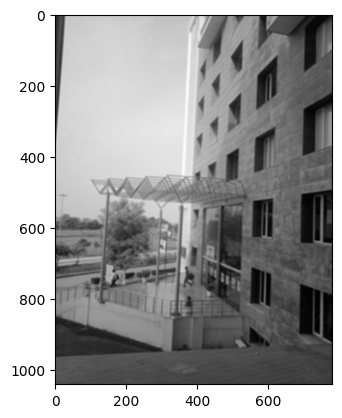

In [2]:
blur = cv2.blur(img_gray,(6,6))
plt.imshow(blur, cmap = 'gray')
plt.show()

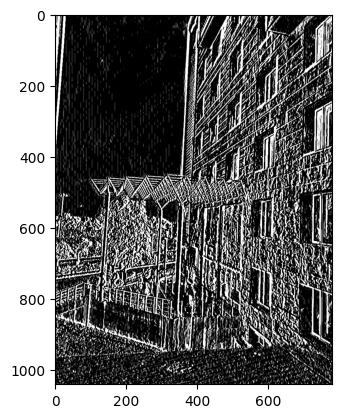

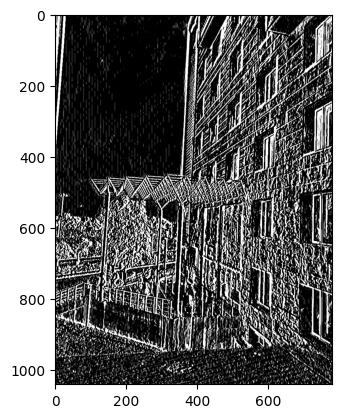

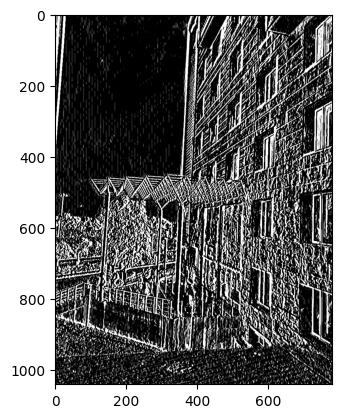

In [3]:
sobelx = cv2.Sobel(img_gray, -1,1,0,ksize=5)
plt.imshow(sobelx, cmap = 'gray')
plt.show()
sobely = cv2.Sobel(img_gray, -1,1,0,ksize=5)
plt.imshow(sobely, cmap = 'gray')
plt.show()
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
plt.imshow(sobelxy, cmap = 'gray')
plt.show()

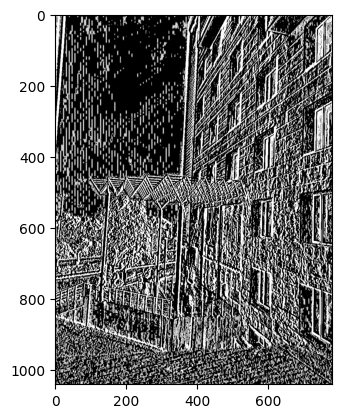

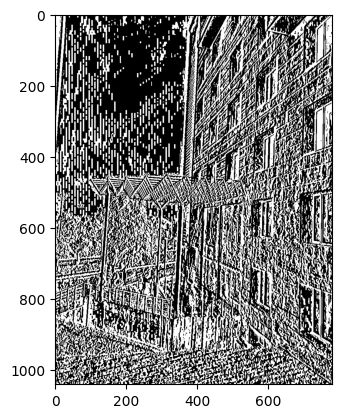

In [5]:
import numpy as np
gradient_magnitude = np.sqrt(sobelx*2+sobely*2)
plt.imshow(gradient_magnitude, cmap = 'gray')
plt.show()
gradient_direction = np.arctan2(sobely,sobelx)
plt.imshow(gradient_direction, cmap = 'gray')
plt.show()

NameError: name 'suppressed' is not defined

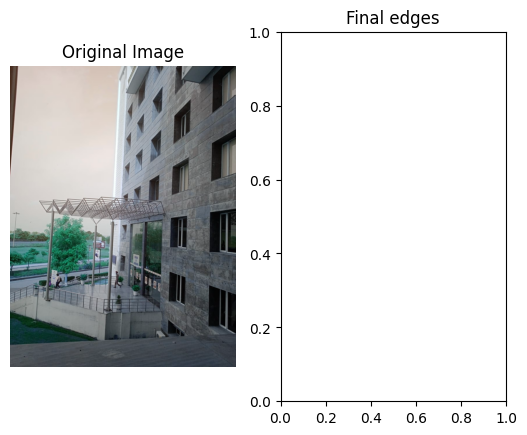

In [17]:
import numpy as np
def non_max_supp(gradient_magnitude,gradient_direction):
    rows, cols = gradient_magnitude.shape
    suppressed = np.zeros_like(gradient_magnitude)

    for i in range (1, rows-1):
        for j in range (1, cols - 1):
            angle = gradient_direction[i,j]

            if 0 <= angle < 30 or 360 <= angle <= 360:
                adjacent1 = gradient_magnitude[i, j+1]
                adjacent2 = gradient_magnitude[i, j-1]
            elif 30 <= angle <= 60:
                adjacent1 = gradient_magnitude[i-1, j+1]
                adjacent2 = gradient_magnitude[i+1, j-1]
            elif 60 <= angle < 120:
                adjacent1 = gradient_magnitude[i - 1, j]
                adjacent2 = gradient_magnitude[i + 1, j]
            else:
                adjacent1 = gradient_magnitude[i - 1, j - 1]
                adjacent2 = gradient_magnitude[i + 1, j + 1]
            if gradient_magnitude[i, j] >= adjacent1 and gradient_magnitude[i, j] >= adjacent2:
                suppressed[i, j] = gradient_magnitude[i, j]

plt.subplot(121)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title('Final edges')
plt.imshow(suppressed, cmap='gray')
plt.axis('off')

plt.show()
